<ul>
    <li> Graphs are sets of connected nodes
(vertices).</li>
    <li> The connections are referred to as edges. </li>
    <li> In TensorFlow each node is an operation
with possible inputs that can supply
some output. </li>
    <li> In general, with TensorFlow we will
construct a graph and then execute it. </li>
    <li>  Let’s start showing some simple
examples in Python </li>
    <li> We’ll also discuss how TensorFlow uses a
default graph. </li>

</ul>

# TensorFlow Basics

In [384]:
import tensorflow as tf

In [385]:
# Make sure you are using 1.3 for exact sytnax matching!
print(tf.__version__)

1.10.0


## Tensors

In [386]:
hello = tf.constant('Hello')

In [387]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [388]:
world = tf.constant('World')

In [389]:
result = hello + world

In [390]:
result

<tf.Tensor 'add_57:0' shape=() dtype=string>

In [391]:
type(result)

tensorflow.python.framework.ops.Tensor

In [392]:
with tf.Session() as sess:
    result = sess.run(hello+world)

In [393]:
result

b'HelloWorld'

** Computations **

In [394]:
tensor_1 = tf.constant(1)
tensor_2 = tf.constant(2)

In [395]:
type(tensor_1)

tensorflow.python.framework.ops.Tensor

In [396]:
tensor_1 + tensor_2

<tf.Tensor 'add_59:0' shape=() dtype=int32>

In [397]:
sess

In [398]:
sess.close()

## Operations

In [399]:
const = tf.constant(10)

In [400]:
fill_mat = tf.fill((4,4),10)

In [401]:
myzeros = tf.zeros((4,4))

In [402]:
myones = tf.ones((4,4))

In [403]:
myrandn = tf.random_normal((4,4),mean=0,stddev=0.5)

In [404]:
myrandu = tf.random_uniform((4,4),minval=0,maxval=1)

In [405]:
my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]

## Interactive Session

Useful for Notebook Sessions

In [406]:
# Only run this cell once!
sess = tf.InteractiveSession()

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [407]:
for op in my_ops:
    print(op.eval())
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[ 0.13583376  0.56342447  0.84428936 -0.22405893]
 [-0.16089272  0.19664195 -0.11812125  0.63224363]
 [-0.35225427 -0.5921769  -0.2127561  -1.213086  ]
 [-0.38715953  0.27093434 -0.16411908  0.46514577]]


[[0.38730407 0.2080828  0.07261407 0.75335956]
 [0.95423555 0.5095073  0.72452664 0.1351515 ]
 [0.08363593 0.23460269 0.66321766 0.6758652 ]
 [0.11740601 0.35118806 0.9211184  0.09614837]]




## Matrix Multiplication

In [408]:
a = tf.constant([ [1,2],
                  [3,4] ])

In [409]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [410]:
b = tf.constant([[10],[100]])

In [411]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [412]:
result = tf.matmul(a,b)

In [413]:
result.eval()

array([[210],
       [430]], dtype=int32)

# TensorFlow Graphs

### Simple Example

In [414]:
n1 = tf.constant(1)
n2 = tf.constant(2)

In [415]:
n3 = n1 + n2

In [416]:
print(n3)

Tensor("add_60:0", shape=(), dtype=int32)


In [417]:
with tf.Session() as sess:
    result = sess.run(n3)

print(result)

3


___
When you start TF, a default Graph is created, you can create additional graphs easily:

In [418]:
print(tf.get_default_graph())

In [419]:
g = tf.Graph()

In [420]:
print(g)

In [421]:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()

In [422]:
graph_one is tf.get_default_graph()


True

In [423]:
graph_two is tf.Graph()

False

Setting graph_two as default graph:

In [424]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


But outside the with graph_two is still **NOT** a default graph

In [425]:
graph_two is tf.get_default_graph()

False

# Variables and Placeholders

<ul>
    <li> There are two main types of tensor
        objects in a Graph: Variables and Placeholders </li>
    
    <li> During the optimization process
TensorFlow tunes the parameters of the
model. </li>
    
    <li> Variables can hold the values of weights
and biases throughout the session. </li>
    
    <li> Variables need to be initialized. </li>
    
    <li> Placeholders are initially empty and are
used to feed in the actual training
examples. </li>
    
    <li> However they do need a declared
expected data type (tf.float32) with an
optional shape argument. </li>
    
    <li> Let’s see some examples of each. </li>
    
    <li> Once we understand how they work
we’ll be ready to build our first model
with TensorFlow! </li>
    
    





</ul>

## Variables

In [426]:
import tensorflow as tf
sess = tf.InteractiveSession()
my_tensor = tf.random_uniform((4,4),0,1)

my_var = tf.Variable(initial_value=my_tensor)

print(my_var)

<tf.Variable 'Variable_17:0' shape=(4, 4) dtype=float32_ref>


/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [427]:
sess.run(my_var)

FailedPreconditionError: Attempting to use uninitialized value Variable_17
	 [[Node: _retval_Variable_17_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_17)]]

#### Note! You must initialize all global variables!

In [ ]:
# This line is really important, it is easy to forget!
init = tf.global_variables_initializer()

In [ ]:
init.run()

my_var.eval()

In [ ]:
sess.run(my_var)

## Placeholders

In [ ]:
ph = tf.placeholder(tf.float64)

ph = tf.placeholder(tf.int32)

# For shape its common to use (None,# of Features) 
# because None can be filled by number of samples in data
ph = tf.placeholder(tf.float32,shape=(None,5))
# None is for number of samples feed into the data which we don't know the size beforehand

<ul>
    <li> With the above building blocks we can
create our first neuron </li>
    <li> We’ll create a neuron that performs a
very simple linear fit to some 2-D data </li>
    <li> Our steps are: Build a Graph , Initiate the Session, Feed Data In and get Output </li>

</ul>

# First Neurons

In [ ]:
import numpy as np
import tensorflow as tf

** Set Random Seeds for same results **

In [ ]:
np.random.seed(1)
tf.set_random_seed(1)

** Data Setup **  
Setting Up some Random Data for Demonstration Purposes

In [ ]:
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [ ]:
rand_a

In [ ]:
rand_b

### Placeholders

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [ ]:
add_op = a+b
mult_op = a*b

### Running Sessions  to create Graphs with Feed Dictionaries

In [ ]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

## Example Neural Network


In [ ]:
n_features = 10
n_dense_neurons = 3
x = tf.placeholder(tf.float32,(None,n_features))

b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

** Operation Activation Function **

In [ ]:
xW = tf.matmul(x,W)

z = tf.add(xW,b)

# tf.nn.relu() or tf.tanh()
a = tf.sigmoid(z)


** Variable Intializer! **

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})

In [ ]:
print(layer_out)

## Full Network Example

Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is the x_data. We are trying to figure out the slope and the intercept for the line that best fits our data!

### Artifical Data (Some Made Up Regression Data)

In [429]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [430]:
x_data

array([ 0.76638916,  1.87273968,  3.49129583,  3.96790761,  3.31725733,
        4.11519596,  5.24529963,  6.36269724,  8.12752209, 11.08008385])

In [431]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

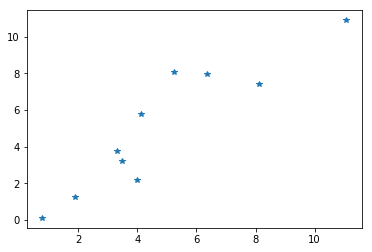

In [432]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label,'*')

In [433]:
# VARIABLES

m = tf.Variable(0.39)
b = tf.Variable(0.2)

In [452]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


In [453]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [454]:
init = tf.global_variables_initializer()

In [455]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

In [456]:
final_slope

1.026349

In [457]:
final_intercept

0.16815037

### Evaluating Results

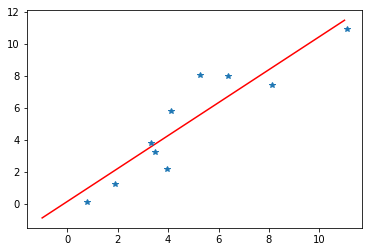

In [460]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')